# Crime Rate Prediction Project
## Overview
In this project, we aim to analyze historical crime data and predict the cluster based on features such as time, place, and other related information.
By applying data mining techniques like clustering and classification, we can discover hidden patterns and provide useful insights that may help in future crime prevention.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing 
### Training Set

In [2]:
df = pd.read_csv('train.csv')

dftrain_sampled = df.sample(n=15000, random_state=42)

dftrain_sampled = dftrain_sampled.reset_index(drop=True)

dftrain_sampled.to_csv('training.csv', index=False)


In [3]:
dftrain_sampled.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2010-07-04 23:00:00,LARCENY/THEFT,ATTEMPTED GRAND THEFT FROM PERSON,Sunday,TENDERLOIN,NONE,100 Block of POWELL ST,-122.407878,37.785968
1,2004-06-26 22:43:00,ASSAULT,BATTERY OF A POLICE OFFICER,Saturday,PARK,"ARREST, BOOKED",2400 Block of GEARY BL,-122.443597,37.782644
2,2013-02-09 21:26:00,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Saturday,SOUTHERN,"ARREST, CITED",HOWARD ST / 3RD ST,-122.400474,37.785029
3,2006-12-03 22:30:00,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Sunday,NORTHERN,"ARREST, CITED",VANNESS AV / HAYES ST,-122.419698,37.777301
4,2014-09-21 08:45:00,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Sunday,PARK,NONE,BEULAH ST / SHRADER ST,-122.451488,37.767516
5,2010-08-29 18:00:00,NON-CRIMINAL,LOST PROPERTY,Sunday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932
6,2013-02-10 17:00:00,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,NONE,100 Block of HAIGHT ST,-122.424641,37.772789
7,2005-09-19 16:00:00,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Monday,TARAVAL,NONE,TAPIA DR / PINTO AV,-122.481353,37.720399
8,2011-08-09 12:00:00,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Tuesday,NORTHERN,NONE,200 Block of FELL ST,-122.421973,37.775998
9,2013-06-02 21:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,RICHMOND,NONE,1700 Block of LYON ST,-122.445239,37.786977


In [4]:
dftrain_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dates       15000 non-null  object 
 1   Category    15000 non-null  object 
 2   Descript    15000 non-null  object 
 3   DayOfWeek   15000 non-null  object 
 4   PdDistrict  15000 non-null  object 
 5   Resolution  15000 non-null  object 
 6   Address     15000 non-null  object 
 7   X           15000 non-null  float64
 8   Y           15000 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.0+ MB


In [5]:
dftrain_sampled.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [6]:
dftrain_sampled.duplicated().sum()

np.int64(0)

In [7]:
dftrain_sampled['Dates'] = pd.to_datetime(dftrain_sampled['Dates'])

dftrain_sampled['Date'] = dftrain_sampled['Dates'].dt.date
dftrain_sampled['Time'] = dftrain_sampled['Dates'].dt.time

dftrain_sampled = dftrain_sampled.drop(columns=['Dates'])

In [8]:
#To ensure that the 'Date' and 'Time' columns are in the correct format.
print(type(dftrain_sampled['Date'].iloc[0]))  
print(type(dftrain_sampled['Time'].iloc[0])) 

<class 'datetime.date'>
<class 'datetime.time'>


In [9]:
#Detecting outliers in the 'X' and 'Y' columns using the IQR.
Q1_x, Q3_x = dftrain_sampled['X'].quantile([0.25, 0.75])
IQR_x = Q3_x - Q1_x
lower_x, upper_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x

Q1_y, Q3_y = dftrain_sampled['Y'].quantile([0.25, 0.75])
IQR_y = Q3_y - Q1_y
lower_y, upper_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

dftrain_sampled = dftrain_sampled[
    (dftrain_sampled['X'] >= lower_x) & (dftrain_sampled['X'] <= upper_x) &
    (dftrain_sampled['Y'] >= lower_y) & (dftrain_sampled['Y'] <= upper_y)   
]

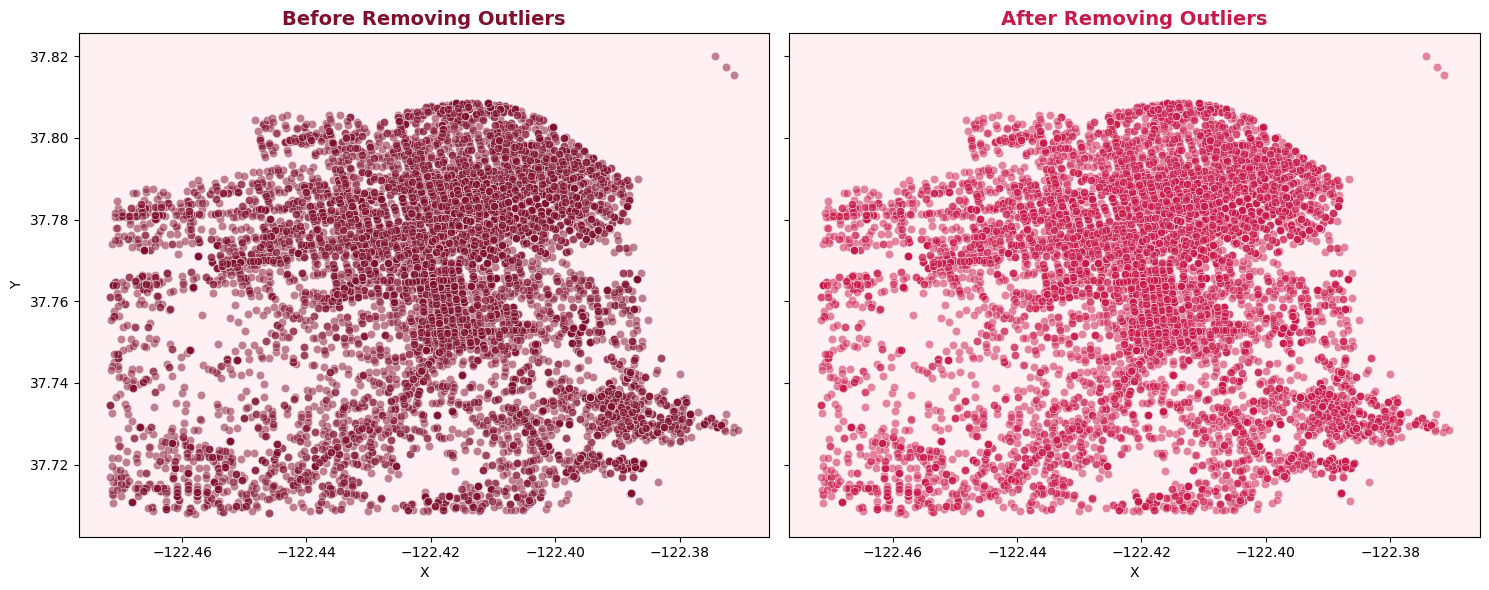

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)

sns.scatterplot(ax=axes[0], x=dftrain_sampled['X'], y=dftrain_sampled['Y'], alpha=0.5, color='#800f2f')
axes[0].set_title('Before Removing Outliers', fontsize=14, weight='bold', color='#800f2f')
axes[0].set_facecolor('#fff0f3')

sns.scatterplot(ax=axes[1], x=dftrain_sampled['X'], y=dftrain_sampled['Y'], alpha=0.5, color='#c9184a')
axes[1].set_title('After Removing Outliers', fontsize=14, weight='bold', color='#c9184a')
axes[1].set_facecolor('#fff0f3')

plt.tight_layout()
plt.show()

In [11]:
dftrain_sampled.head(10)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time
0,LARCENY/THEFT,ATTEMPTED GRAND THEFT FROM PERSON,Sunday,TENDERLOIN,NONE,100 Block of POWELL ST,-122.407878,37.785968,2010-07-04,23:00:00
1,ASSAULT,BATTERY OF A POLICE OFFICER,Saturday,PARK,"ARREST, BOOKED",2400 Block of GEARY BL,-122.443597,37.782644,2004-06-26,22:43:00
2,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Saturday,SOUTHERN,"ARREST, CITED",HOWARD ST / 3RD ST,-122.400474,37.785029,2013-02-09,21:26:00
3,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Sunday,NORTHERN,"ARREST, CITED",VANNESS AV / HAYES ST,-122.419698,37.777301,2006-12-03,22:30:00
4,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Sunday,PARK,NONE,BEULAH ST / SHRADER ST,-122.451488,37.767516,2014-09-21,08:45:00
5,NON-CRIMINAL,LOST PROPERTY,Sunday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932,2010-08-29,18:00:00
6,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,NONE,100 Block of HAIGHT ST,-122.424641,37.772789,2013-02-10,17:00:00
8,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Tuesday,NORTHERN,NONE,200 Block of FELL ST,-122.421973,37.775998,2011-08-09,12:00:00
9,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,RICHMOND,NONE,1700 Block of LYON ST,-122.445239,37.786977,2013-06-02,21:00:00
10,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,CENTRAL,DISTRICT ATTORNEY REFUSES TO PROSECUTE,1200 Block of CALIFORNIA ST,-122.414933,37.791255,2004-04-16,08:00:00


### Visualization

- Crime Distribution : This helps to understand which types of crimes are most frequent in the dataset.

C:\Users\mo\AppData\Local\Temp\ipykernel_21048\2452233434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=crime_counts.index, y=crime_counts.values, palette=custom_palette)
C:\Users\mo\AppData\Local\Temp\ipykernel_21048\2452233434.py:6: UserWarning: 
The palette list has fewer values (10) than needed (37) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=crime_counts.index, y=crime_counts.values, palette=custom_palette)


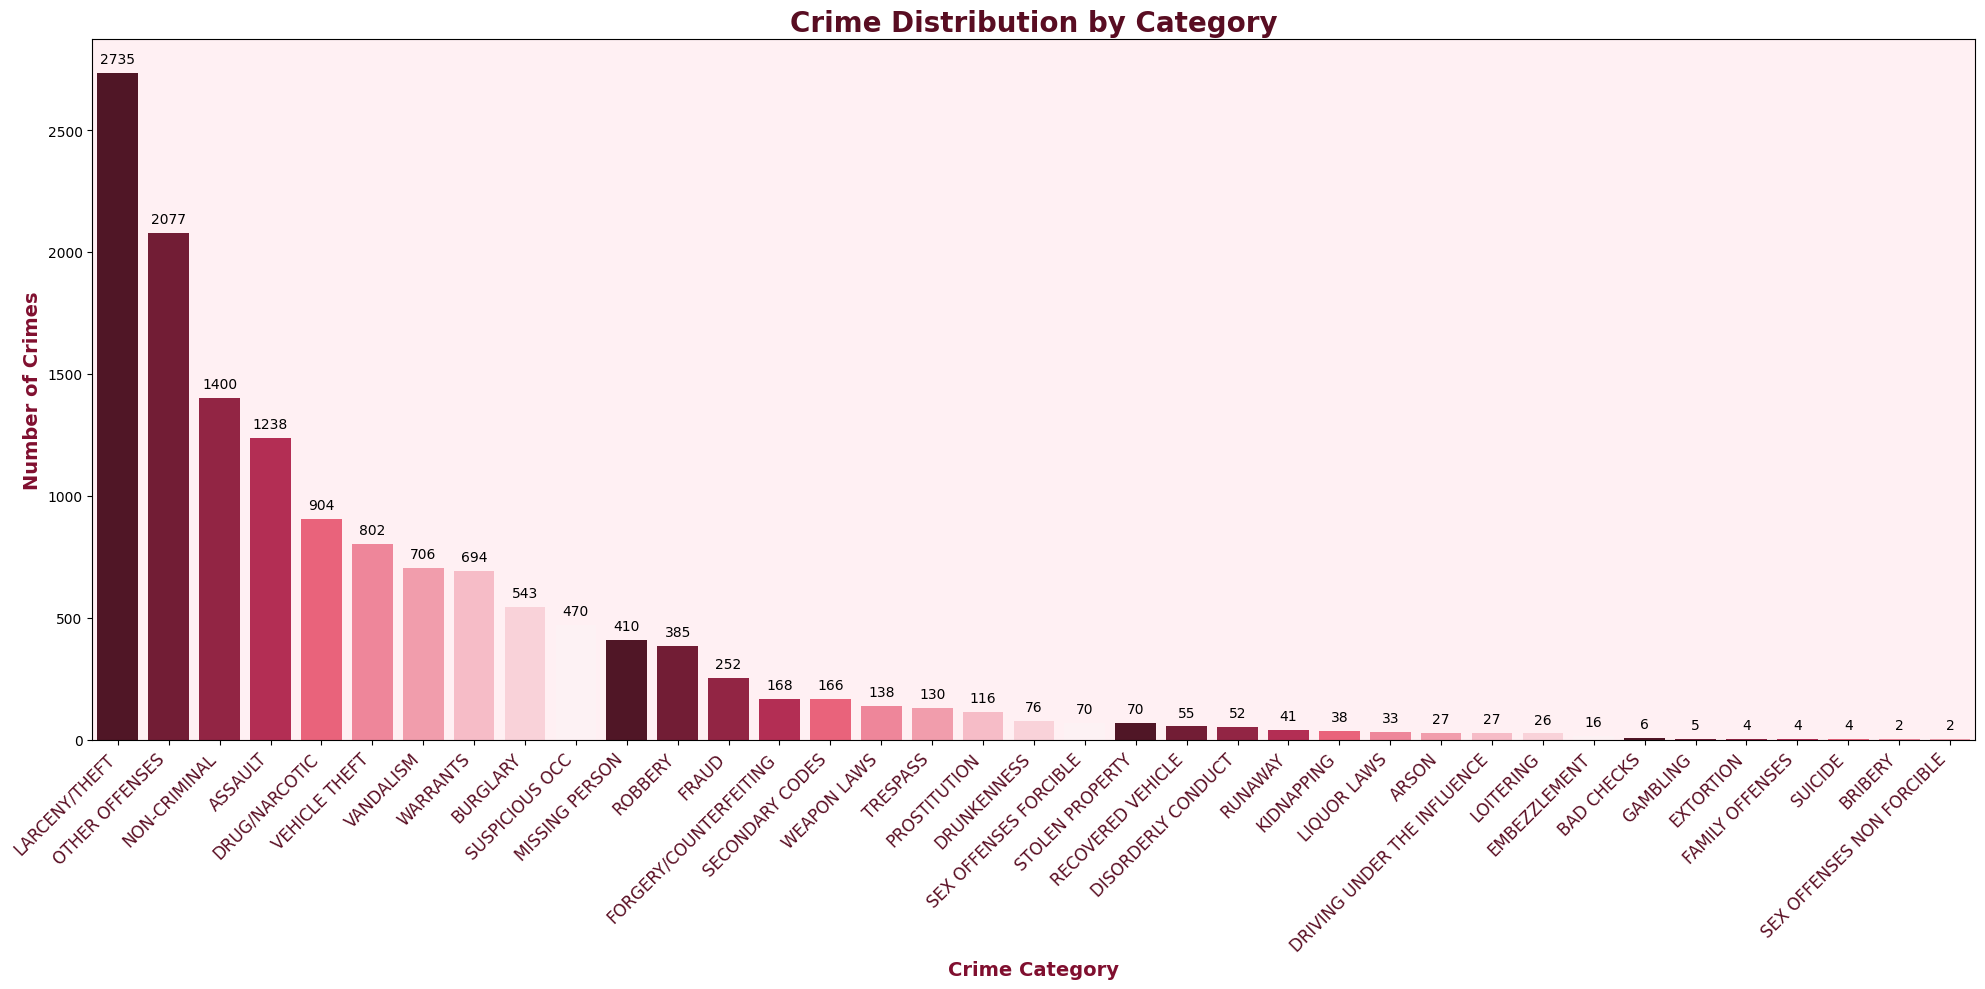

In [12]:
custom_palette = ['#590d22', '#800f2f', '#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3', '#ffb3c1', '#ffccd5', '#fff0f3']

crime_counts = dftrain_sampled['Category'].value_counts()

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=crime_counts.index, y=crime_counts.values, palette=custom_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set_title('Crime Distribution by Category', fontsize=20, weight='bold', color='#590d22')
ax.set_xlabel('Crime Category', fontsize=14, weight='bold', color='#800f2f')
ax.set_ylabel('Number of Crimes', fontsize=14, weight='bold', color='#800f2f')
ax.set_facecolor('#fff0f3')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#590d22')
plt.tight_layout()
plt.show()

- Resolution of Crimes: This visualize how different crime resolutions are distributed across the dataset.


C:\Users\mo\AppData\Local\Temp\ipykernel_21048\2569599804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette=custom_palette)
C:\Users\mo\AppData\Local\Temp\ipykernel_21048\2569599804.py:4: UserWarning: 
The palette list has fewer values (10) than needed (17) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette=custom_palette)


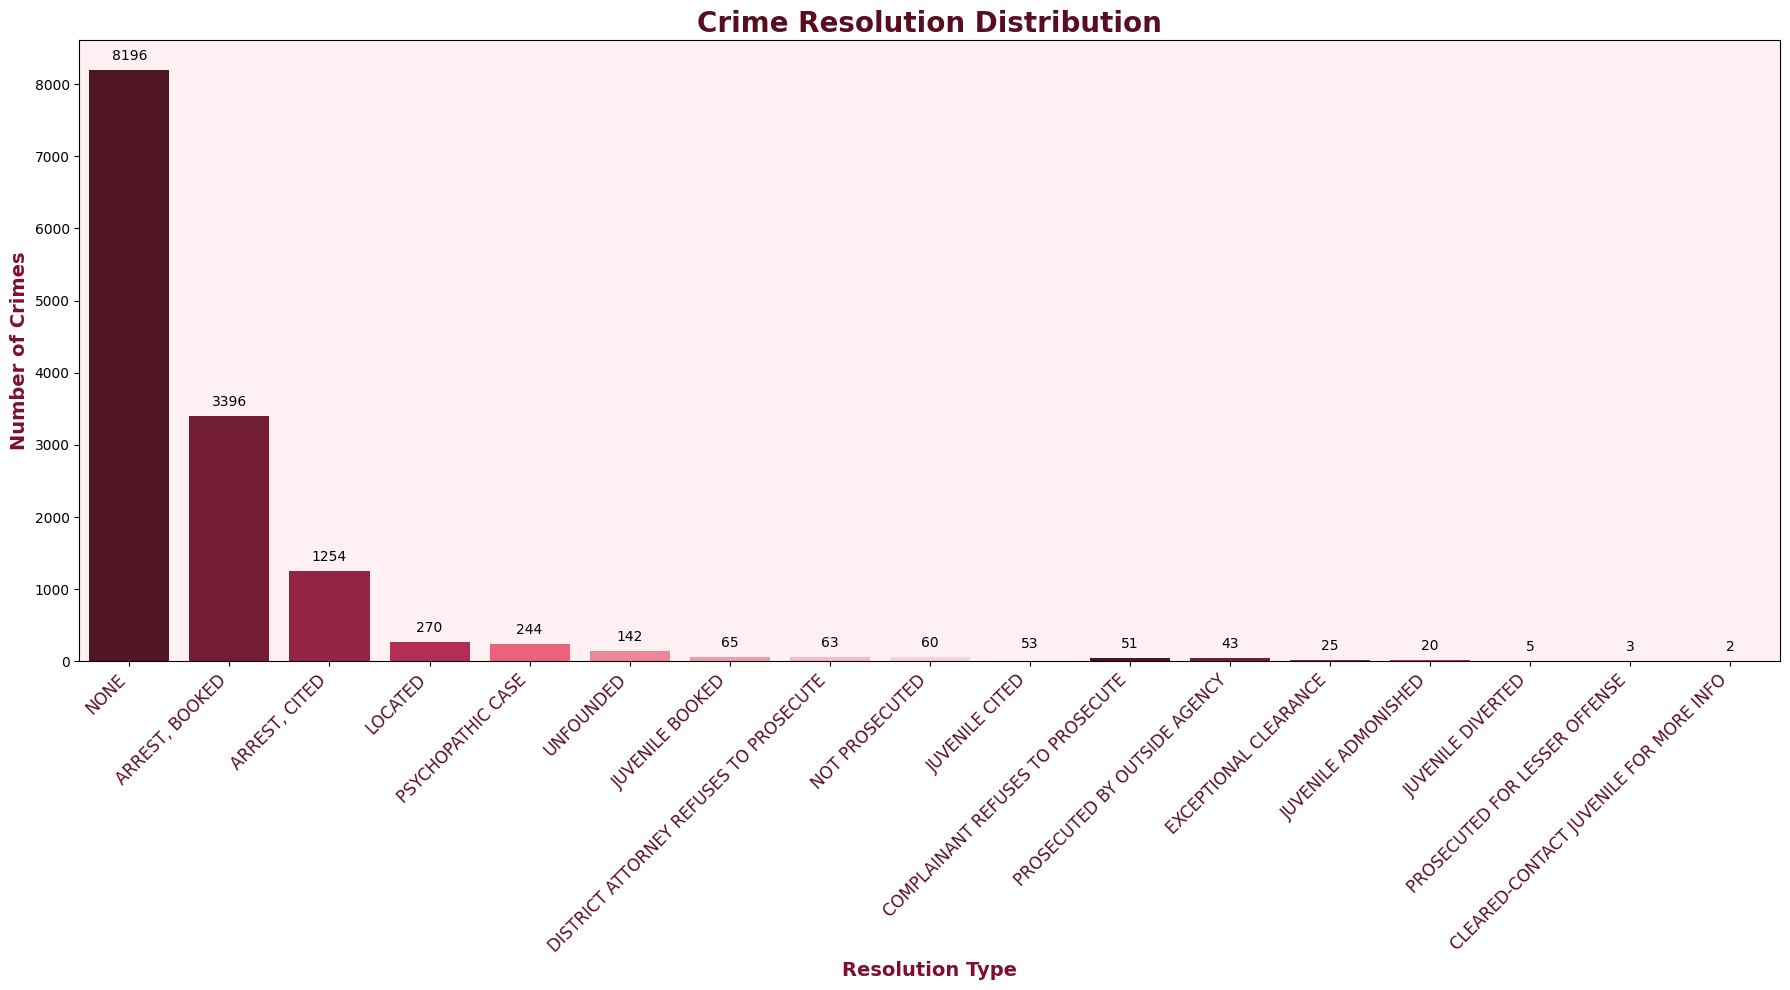

In [13]:
resolution_counts = dftrain_sampled['Resolution'].value_counts()

plt.figure(figsize=(18, 10))
ax = sns.barplot(x=resolution_counts.index, y=resolution_counts.values, palette=custom_palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set_title('Crime Resolution Distribution', fontsize=20, weight='bold', color='#590d22')
ax.set_xlabel('Resolution Type', fontsize=14, weight='bold', color='#800f2f')
ax.set_ylabel('Number of Crimes', fontsize=14, weight='bold', color='#800f2f')
ax.set_facecolor('#fff0f3')
plt.xticks(rotation=45, ha='right', fontsize=12, color='#590d22')
plt.tight_layout()
plt.show()

- Crimes over time: This helping to identify patterns such as increases, decreases, or seasonal variations in criminal activity.

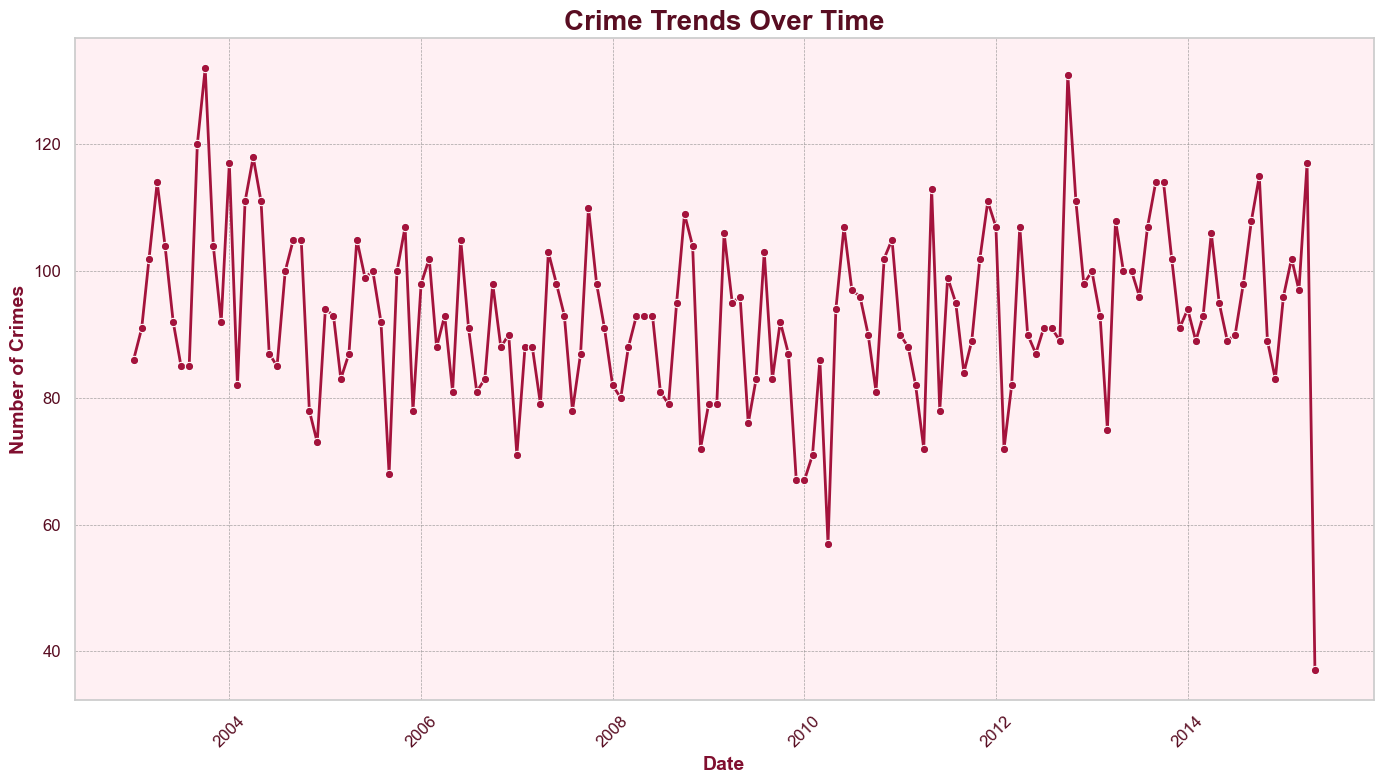

In [14]:
dftrain_sampled['Date'] = pd.to_datetime(dftrain_sampled['Date'])
crime_trends = dftrain_sampled.groupby(dftrain_sampled['Date'].dt.to_period('M')).size().reset_index(name='Crime Count')
crime_trends['Date'] = crime_trends['Date'].dt.to_timestamp()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=crime_trends, x='Date', y='Crime Count', marker='o', color='#a4133c', linewidth=2)
ax.set_title('Crime Trends Over Time', fontsize=20, weight='bold', color='#590d22')
ax.set_xlabel('Date', fontsize=14, weight='bold', color='#800f2f')
ax.set_ylabel('Number of Crimes', fontsize=14, weight='bold', color='#800f2f')
ax.tick_params(axis='x', rotation=45, labelsize=12, colors='#590d22')
ax.tick_params(axis='y', labelsize=12, colors='#590d22')
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().set_facecolor('#fff0f3')
plt.tight_layout()
plt.show()

## K-Medoid Clustring

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split

dftrain_sampled['Time_in_Seconds'] = pd.to_datetime(dftrain_sampled['Time'], format='%H:%M:%S').dt.hour * 3600 + \
                                     pd.to_datetime(dftrain_sampled['Time'], format='%H:%M:%S').dt.minute * 60 + \
                                     pd.to_datetime(dftrain_sampled['Time'], format='%H:%M:%S').dt.second

features = dftrain_sampled[['X', 'Y', 'Time_in_Seconds']]

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

dftrain_features = dftrain_sampled[['X', 'Y', 'Time_in_Seconds']]
normalized_features = scaler.fit_transform(dftrain_features)

- Elbow method: to detect best k (n_cluster)

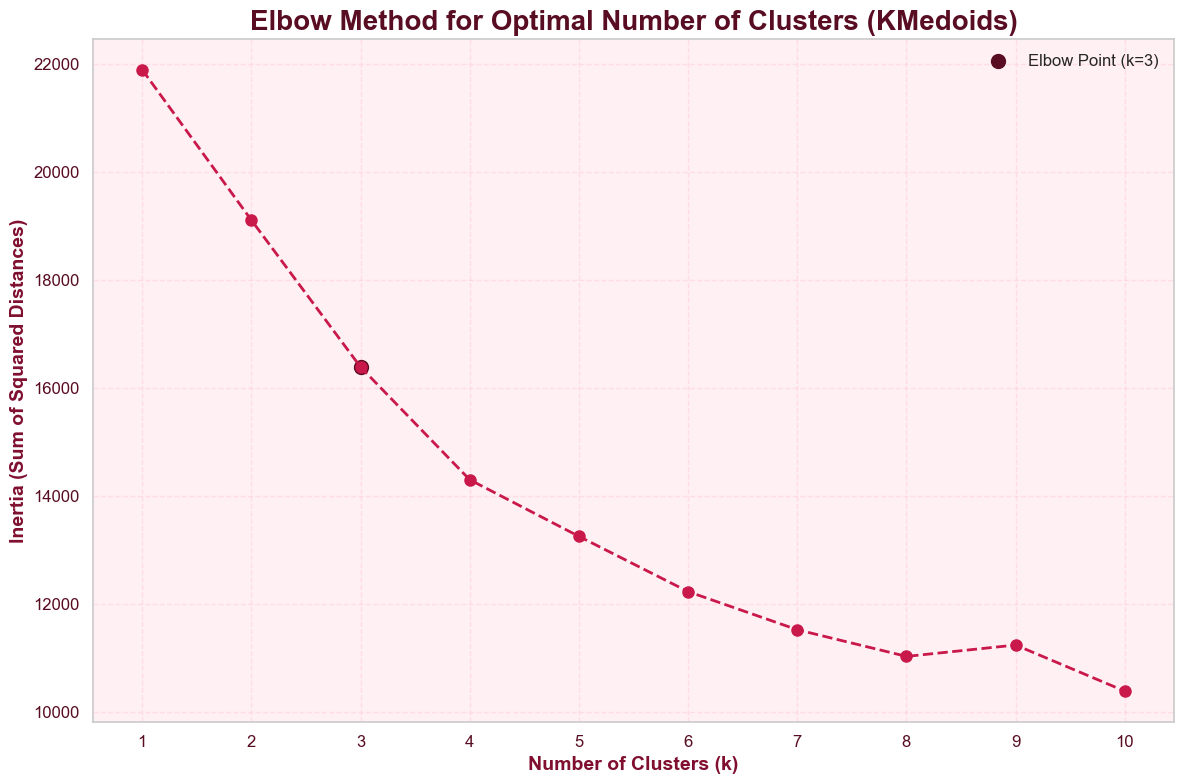

In [16]:
cluster_range = range(1, 11)  
inertia_values = []

for n_clusters in cluster_range:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    kmedoids.fit(normalized_features)
    inertia = kmedoids.inertia_  
    inertia_values.append(inertia)

plt.figure(figsize=(12, 8))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--', color='#c9184a', markersize=8, linewidth=2)

plt.title('Elbow Method for Optimal Number of Clusters (KMedoids)', fontsize=20, weight='bold', color='#590d22')
plt.xlabel('Number of Clusters (k)', fontsize=14, weight='bold', color='#800f2f')
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=14, weight='bold', color='#800f2f')
plt.xticks(cluster_range, fontsize=12, color='#590d22')
plt.yticks(fontsize=12, color='#590d22')
plt.grid(alpha=0.5, color='#ffccd5', linestyle='--')
plt.gca().set_facecolor('#fff0f3')

plt.scatter([3], [inertia_values[2]], color='#590d22', s=100, label='Elbow Point (k=3)')
plt.legend(fontsize=12, loc='best', frameon=False)

plt.tight_layout()
plt.show()

In [17]:
optimal_clusters = 4

final_kmedoids = KMedoids(n_clusters=optimal_clusters, random_state=42)
dftrain_sampled['Cluster'] = final_kmedoids.fit_predict(normalized_features)

cluster_centers = scaler.inverse_transform(final_kmedoids.cluster_centers_)

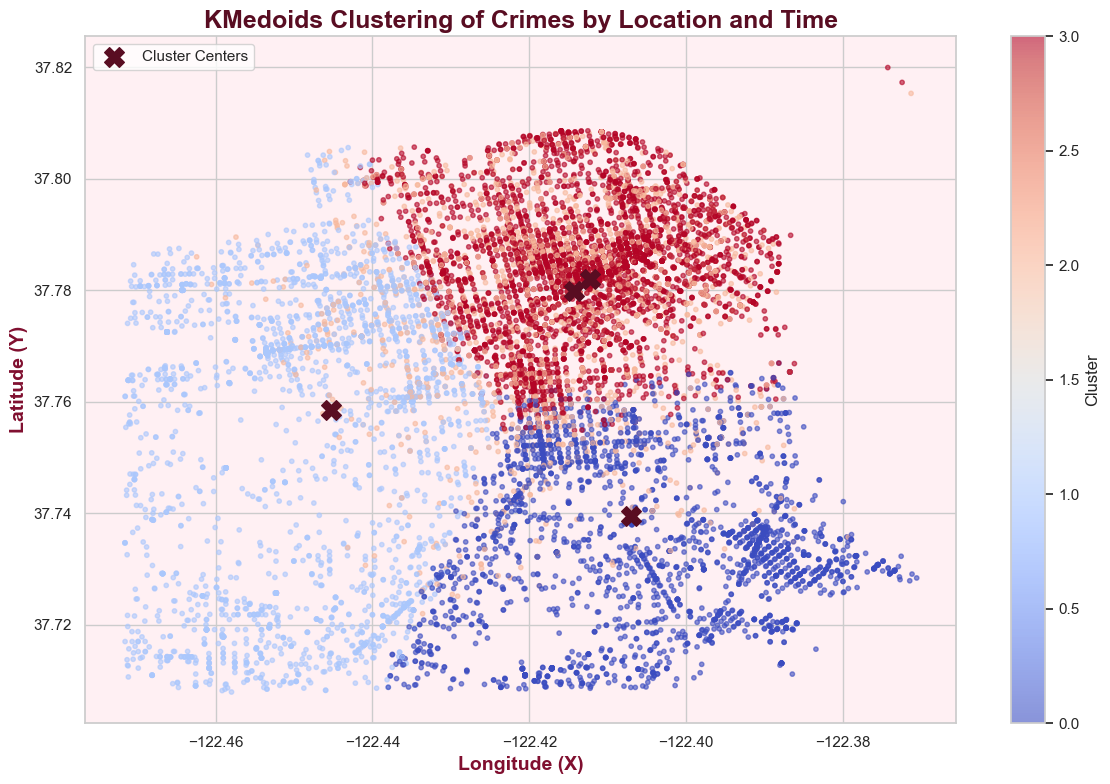

In [18]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(dftrain_sampled['X'], dftrain_sampled['Y'], c=dftrain_sampled['Cluster'], cmap='coolwarm', s=10, alpha=0.6)
plt.colorbar(scatter, label='Cluster', orientation='vertical')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='#590d22', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Longitude (X)', fontsize=14, weight='bold', color='#800f2f')
plt.ylabel('Latitude (Y)', fontsize=14, weight='bold', color='#800f2f')
plt.title('KMedoids Clustering of Crimes by Location and Time', fontsize=18, weight='bold', color='#590d22')
plt.legend()
plt.gca().set_facecolor('#fff0f3')
plt.tight_layout()
plt.show()

In [19]:
dftrain_sampled['Cluster'] = dftrain_sampled['Cluster']

In [20]:
dftrain_sampled.head(10)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Time,Time_in_Seconds,Cluster
0,LARCENY/THEFT,ATTEMPTED GRAND THEFT FROM PERSON,Sunday,TENDERLOIN,NONE,100 Block of POWELL ST,-122.407878,37.785968,2010-07-04,23:00:00,82800,3
1,ASSAULT,BATTERY OF A POLICE OFFICER,Saturday,PARK,"ARREST, BOOKED",2400 Block of GEARY BL,-122.443597,37.782644,2004-06-26,22:43:00,81780,1
2,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Saturday,SOUTHERN,"ARREST, CITED",HOWARD ST / 3RD ST,-122.400474,37.785029,2013-02-09,21:26:00,77160,3
3,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Sunday,NORTHERN,"ARREST, CITED",VANNESS AV / HAYES ST,-122.419698,37.777301,2006-12-03,22:30:00,81000,3
4,LARCENY/THEFT,PETTY THEFT FROM UNLOCKED AUTO,Sunday,PARK,NONE,BEULAH ST / SHRADER ST,-122.451488,37.767516,2014-09-21,08:45:00,31500,1
5,NON-CRIMINAL,LOST PROPERTY,Sunday,TENDERLOIN,NONE,EDDY ST / JONES ST,-122.412597,37.783932,2010-08-29,18:00:00,64800,3
6,ASSAULT,INFLICT INJURY ON COHABITEE,Sunday,NORTHERN,NONE,100 Block of HAIGHT ST,-122.424641,37.772789,2013-02-10,17:00:00,61200,3
8,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Tuesday,NORTHERN,NONE,200 Block of FELL ST,-122.421973,37.775998,2011-08-09,12:00:00,43200,3
9,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,RICHMOND,NONE,1700 Block of LYON ST,-122.445239,37.786977,2013-06-02,21:00:00,75600,1
10,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,CENTRAL,DISTRICT ATTORNEY REFUSES TO PROSECUTE,1200 Block of CALIFORNIA ST,-122.414933,37.791255,2004-04-16,08:00:00,28800,2


In [21]:
dftrain_sampled.to_csv('training_with_clusters.csv', index=False)

In [22]:
dftrain_sampled.shape

(13892, 12)

### Metric Evaluation

In [23]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(normalized_features, dftrain_sampled['Cluster'])
print(f"Silhouette Score for KMedoids clustering with {optimal_clusters} clusters: {silhouette_avg:.4f}")

print("Cluster Centers (Original Scale):")
print(cluster_centers)

Silhouette Score for KMedoids clustering with 4 clusters: 0.3257
Cluster Centers (Original Scale):
[[-1.22406980e+02  3.77395670e+01  5.43000000e+04]
 [-1.22445256e+02  3.77585393e+01  5.76000000e+04]
 [-1.22414312e+02  3.77798339e+01  1.72200000e+04]
 [-1.22412224e+02  3.77820729e+01  6.32400000e+04]]


In [24]:
from sklearn.metrics import davies_bouldin_score

dbi_score = davies_bouldin_score(normalized_features, dftrain_sampled['Cluster'])
print(f"Davies-Bouldin Index for KMedoids clustering with {optimal_clusters} clusters: {dbi_score:.4f}")

Davies-Bouldin Index for KMedoids clustering with 4 clusters: 1.0178


In [25]:
from sklearn.metrics import calinski_harabasz_score

calinski_harabasz = calinski_harabasz_score(normalized_features, dftrain_sampled['Cluster'])
print(f"Calinski-Harabasz Index for KMedoids clustering with {optimal_clusters} clusters: {calinski_harabasz:.4f}")

Calinski-Harabasz Index for KMedoids clustering with 4 clusters: 6347.2155


In [41]:
import folium
from folium.plugins import MarkerCluster, Search

specific_crimes = [
    'KIDNAPPING', 'DRIVING UNDER THE INFLUENCE', 'FRAUD', 'ROBBERY',
    'FAMILY', 'EXTORTION OFFENSES', 'SUICIDE', 'ASSAULT', 'LARCENY/THEFT'
]

filtered_data = dftrain_sampled[dftrain_sampled['Category'].isin(specific_crimes)]

category_colors = {
    'KIDNAPPING': 'darkpurple',
    'DRIVING UNDER THE INFLUENCE': 'red',
    'FRAUD': 'orange',
    'ROBBERY': 'darkred',
    'FAMILY': 'pink',
    'EXTORTION OFFENSES': 'purple',
    'SUICIDE': 'gray',
    'ASSAULT': 'blue',
    'LARCENY/THEFT': 'green'
}

# Initialize the map
map_center = [filtered_data['Y'].mean(), filtered_data['X'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12, tiles="CartoDB positron")

# Add marker clusters
marker_cluster = MarkerCluster().add_to(crime_map)

for index, row in filtered_data.iterrows():
    category_color = category_colors.get(row['Category'], 'blue')  
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=folium.Popup(
            f"<b>Category:</b> {row['Category']}<br>"
            f"<b>PdDistrict:</b> {row.get('PdDistrict', 'N/A')}<br>"
            f"<b>Time:</b> {row.get('Time', 'N/A')}",
            max_width=300
        ),
        tooltip=folium.Tooltip(
            f"<b>Category:</b> {row['Category']}<br>"
            f"<b>PdDistrict:</b> {row.get('PdDistrict', 'N/A')}<br>"
            f"<b>Time:</b> {row.get('Time', 'N/A')}"
        ),  # Tooltip for hover effect with detailed info
        icon=folium.Icon(color=category_color, icon="info-sign")
    ).add_to(marker_cluster)

# Add a search bar
Search(
    layer=marker_cluster,
    search_label="Category",
    placeholder="Search for a crime category",
    collapsed=False,
).add_to(crime_map)

# Custom Legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    background-color: white;
    border: 2px solid black;
    z-index: 1000;
    padding: 10px;
    font-size: 12px;
    ">
    <b>Crime Categories:</b><br>
    <i style="color: darkpurple;">&#9679;</i> KIDNAPPING<br>
    <i style="color: red;">&#9679;</i> DRIVING UNDER THE INFLUENCE<br>
    <i style="color: orange;">&#9679;</i> FRAUD<br>
    <i style="color: darkred;">&#9679;</i> ROBBERY<br>
    <i style="color: pink;">&#9679;</i> FAMILY<br>
    <i style="color: purple;">&#9679;</i> EXTORTION OFFENSES<br>
    <i style="color: gray;">&#9679;</i> SUICIDE<br>
    <i style="color: blue;">&#9679;</i> ASSAULT<br>
    <i style="color: green;">&#9679;</i> LARCENY/THEFT<br>
</div>
'''
crime_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
output_file = "crime_map.html"
crime_map.save(output_file)

## CatBoost Classification

In [37]:
import folium
from folium.plugins import MarkerCluster, Search

specific_crimes = [
    'KIDNAPPING', 'DRIVING UNDER THE INFLUENCE', 'FRAUD', 'ROBBERY',
    'FAMILY', 'EXTORTION OFFENSES', 'SUICIDE', 'ASSAULT', 'LARCENY/THEFT'
]

filtered_data = dftrain_sampled[dftrain_sampled['Category'].isin(specific_crimes)]

category_colors = {
    'KIDNAPPING': 'darkpurple',
    'DRIVING UNDER THE INFLUENCE': 'red',
    'FRAUD': 'orange',
    'ROBBERY': 'darkred',
    'FAMILY': 'pink',
    'EXTORTION OFFENSES': 'purple',
    'SUICIDE': 'gray',
    'ASSAULT': 'blue',
    'LARCENY/THEFT': 'green'
}

# Initialize the map
map_center = [filtered_data['Y'].mean(), filtered_data['X'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12, tiles="CartoDB positron")

# Add marker clusters
marker_cluster = MarkerCluster(name='Crime Locations').add_to(crime_map)

# Add markers to the cluster
for index, row in filtered_data.iterrows():
    category_color = category_colors.get(row['Category'], 'blue')  
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=folium.Popup(
            f"<b>Category:</b> {row['Category']}<br>"
            f"<b>PdDistrict:</b> {row.get('PdDistrict', 'N/A')}<br>"
            f"<b>Time:</b> {row.get('Time', 'N/A')}",
            max_width=300
        ),
        tooltip=folium.Tooltip(
            f"<b>Category:</b> {row['Category']}<br>"
            f"<b>PdDistrict:</b> {row.get('PdDistrict', 'N/A')}<br>"
            f"<b>Time:</b> {row.get('Time', 'N/A')}"
        ),
        icon=folium.Icon(color=category_color, icon="info-sign")
    ).add_to(marker_cluster)

# Add GeoJSON-style data for search
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [row['X'], row['Y']]
            },
            "properties": {
                "Category": row['Category'],
                "PdDistrict": row.get('PdDistrict', 'N/A'),
                "Time": row.get('Time', 'N/A')
            }
        }
        for index, row in filtered_data.iterrows()
    ]
}

# Add Search functionality
Search(
    layer=marker_cluster,
    search_label="Category",  # Ensure the label exists in the GeoJSON properties
    geom_type="Point",  # Specify the type of geometry to search for
    placeholder="Search by Category",
    collapsed=False
).add_to(crime_map)

# Custom Legend
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    background-color: white;
    border: 2px solid black;
    z-index: 1000;
    padding: 10px;
    font-size: 12px;
    ">
    <b>Crime Categories:</b><br>
    <i style="color: darkpurple;">&#9679;</i> KIDNAPPING<br>
    <i style="color: red;">&#9679;</i> DRIVING UNDER THE INFLUENCE<br>
    <i style="color: orange;">&#9679;</i> FRAUD<br>
    <i style="color: darkred;">&#9679;</i> ROBBERY<br>
    <i style="color: pink;">&#9679;</i> FAMILY<br>
    <i style="color: purple;">&#9679;</i> EXTORTION OFFENSES<br>
    <i style="color: gray;">&#9679;</i> SUICIDE<br>
    <i style="color: blue;">&#9679;</i> ASSAULT<br>
    <i style="color: green;">&#9679;</i> LARCENY/THEFT<br>
</div>
'''
crime_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
output_file = "fixed_search_bar_crime_map.html"
crime_map.save(output_file)

In [27]:
from sklearn.model_selection import train_test_split

features = ['X', 'Y', 'DayOfWeek', 'PdDistrict', 'Time_in_Seconds']
target = 'Cluster'

categorical_features = ['DayOfWeek', 'PdDistrict']
dftrain_sampled[categorical_features] = dftrain_sampled[categorical_features].astype('category')

In [28]:
categorical_features = ['DayOfWeek', 'PdDistrict']
dftrain_sampled[categorical_features] = dftrain_sampled[categorical_features].astype('category')

X = dftrain_sampled[features]
y = dftrain_sampled[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=categorical_features,
    random_seed=42,
    verbose=50
)

print("Training the CatBoost model.")
catboost_model.fit(X_train, y_train)

Training the CatBoost model.
0:	learn: 1.1522151	total: 235ms	remaining: 1m 57s
50:	learn: 0.0842623	total: 3.32s	remaining: 29.2s
100:	learn: 0.0518830	total: 6.83s	remaining: 27s
150:	learn: 0.0396659	total: 10.5s	remaining: 24.2s
200:	learn: 0.0338162	total: 15.7s	remaining: 23.3s
250:	learn: 0.0293526	total: 19.8s	remaining: 19.6s
300:	learn: 0.0262180	total: 23.2s	remaining: 15.3s
350:	learn: 0.0235668	total: 26.5s	remaining: 11.3s
400:	learn: 0.0216648	total: 29.6s	remaining: 7.32s
450:	learn: 0.0199701	total: 32.7s	remaining: 3.55s
499:	learn: 0.0184899	total: 35.6s	remaining: 0us


In [30]:
#Evaluate the Model 
y_pred = catboost_model.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9868

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       662
           1       0.98      0.98      0.98       605
           2       0.98      0.99      0.99       811
           3       0.99      0.99      0.99      1395

    accuracy                           0.99      3473
   macro avg       0.99      0.98      0.99      3473
weighted avg       0.99      0.99      0.99      3473



In [31]:
# Evaluate the model on the training set
y_train_pred = catboost_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test set
y_test_pred = catboost_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9982
Test Accuracy: 0.9868


Gap between Trainig and Test Accuracy doesn't big so it not likely overfitting